In [1]:
from pyMez import *
from Code.DataHandlers.GraphModels import *


Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 4.547 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.875 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 9.961 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.009 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.284 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.038 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 1.43 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.013 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.01 s to import Code.Utils.Names
It took 17.167 s to import all of the active modules


In [2]:
s2p=SNP(r"C:\Share\WR15_VDI_MUF_20180316\LRL_1\DUTs\WR15_Line_5079_WR15_20180223_001.s2p")

In [3]:
graph=TwoPortParameterGraph()

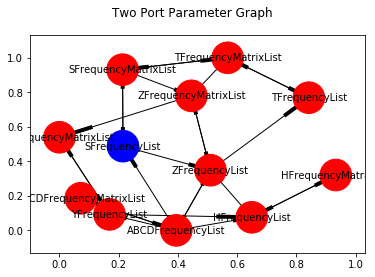

In [4]:
graph.show()

In [5]:
graph.set_state("SFrequencyList",s2p.data)

In [6]:
from Code.Analysis.SParameter import *

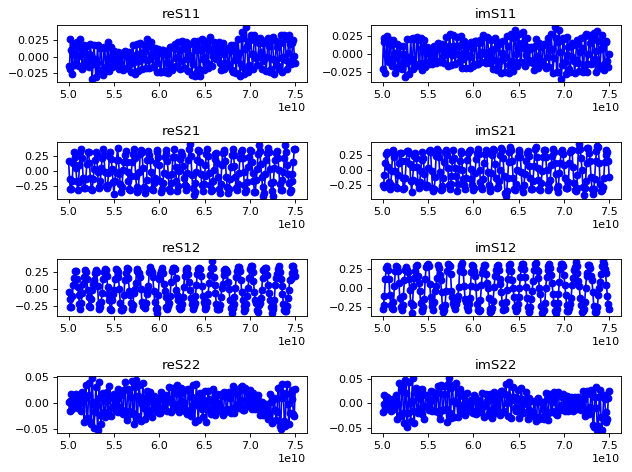

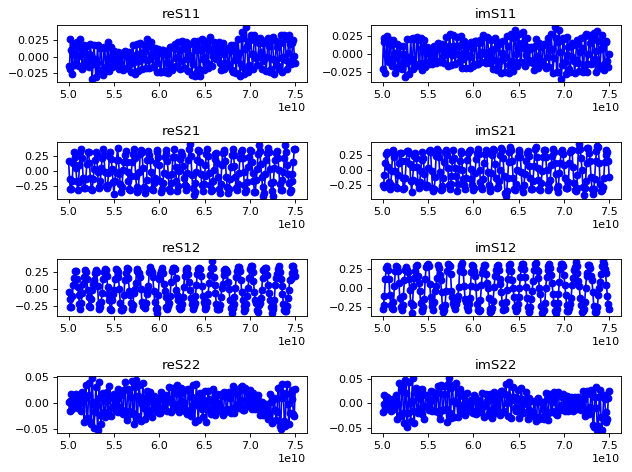

In [8]:
plot_frequency_model(s2p)

In [9]:
s2p.change_data_format("MA")

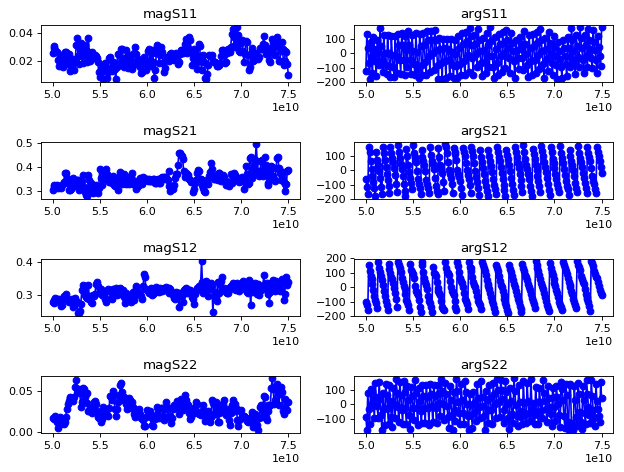

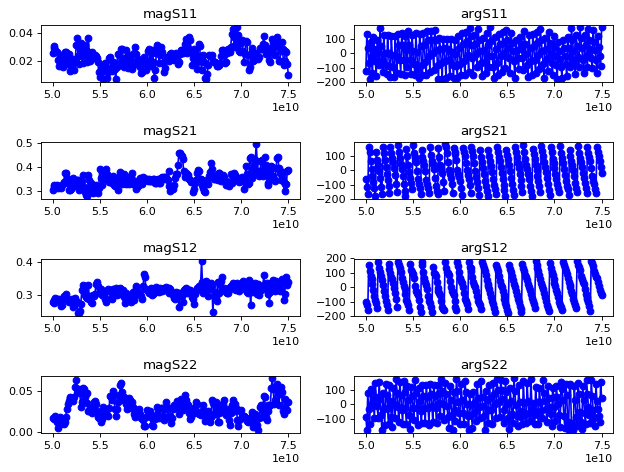

In [10]:
plot_frequency_model(s2p)

In [11]:
graph.node_names

['SFrequencyList',
 'SFrequencyMatrixList',
 'TFrequencyMatrixList',
 'TFrequencyList',
 'ZFrequencyList',
 'ZFrequencyMatrixList',
 'ABCDFrequencyList',
 'ABCDFrequencyMatrixList',
 'HFrequencyList',
 'HFrequencyMatrixList',
 'YFrequencyList',
 'YFrequencyMatrixList']

In [13]:
s2p.change_data_format("RI")

In [15]:
graph.set_state("SFrequencyList",s2p.sparameter_complex)

In [20]:
graph.move_to_node("ZFrequencyList")

['edge_YFrequencyList_HFrequencyList_000', 'edge_HFrequencyList_ZFrequencyList_000']
moving YFrequencyList -> HFrequencyList
moving HFrequencyList -> ZFrequencyList


In [21]:
s2p_container=S2PV1(None,sparameter_complex=graph.data[:])

In [24]:
def build_parameter_column_names(number_of_ports=2,format="RI",parameter="S"):
    """Return a list of column names based on the format and number of ports. Enter
    number_or_ports as a integer and format as text string such as 'RI','MA' or 'DB'"""
    column_names=["Frequency"]
    prefix_1=""
    prefix_2=""
    if re.search('ri',format,re.IGNORECASE):
        prefix_1="re"
        prefix_2="im"
    elif re.search('ma',format,re.IGNORECASE):
        prefix_1="mag"
        prefix_2="arg"
    elif re.search('db',format,re.IGNORECASE):
        prefix_1="db"
        prefix_2="arg"
    else:
        raise TypeError("format must be RI, DB or MA")
    for i in range(number_of_ports):
        for j in range(number_of_ports):
            column_names.append(prefix_1+parameter+str(i+1)+str(j+1))
            column_names.append(prefix_2+parameter+str(i+1)+str(j+1))
    if number_of_ports==2:
        #switch S21 and S12
        [S12_1,S12_2,S21_1,S21_2]=column_names[3:7]
        column_names[3:7]=[S21_1,S21_2,S12_1,S12_2]
    return column_names


In [31]:
build_parameter_column_names(format="MA",parameter="ABCD")

['Frequency',
 'magABCD11',
 'argABCD11',
 'magABCD21',
 'argABCD21',
 'magABCD12',
 'argABCD12',
 'magABCD22',
 'argABCD22']

In [26]:
s2p_container.column_names=build_parameter_column_names(parameter="Z")

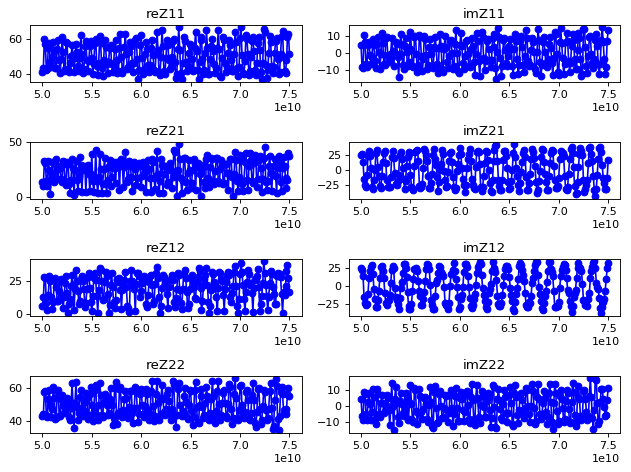

In [27]:
plot_frequency_model(s2p_container);

In [32]:
from Code.DataHandlers.MUFModels import *

In [33]:
help(make_parameter_table)

Help on function make_parameter_table in module Code.DataHandlers.MUFModels:

make_parameter_table(parameter_directory)
    Creates a table from all the parameters in the parameter_directory, returns an AsciiDataTable



In [34]:
table=make_parameter_table(r"C:\Share\WR15_VDI_MUF_20180316\LRL_1\Models\Parameters")

Parameter Number: 0, Name:C:\Share\MUF_WR15\CapacitancePerUnitLength.parameter
Parameter Number: 1, Name:C:\Share\MUF_WR15\Parameters\Close_to_Zero.parameter
Parameter Number: 2, Name:C:\Share\WR15_OML_MUF_20180313\MTRL_1\Models\Parameters\Line1612_Length.parameter
Parameter Number: 3, Name:C:\Share\WR15_OML_MUF_20180313\LRL_1\Models\Parameters\Line4909_Length.parameter
Parameter Number: 4, Name:C:\Share\WR15_OML_MUF_20180313\LRL_1\Models\Parameters\Line5079_Length.parameter
Parameter Number: 5, Name:C:\Share\MUF_WR15\Parameters\loadR.parameter
Parameter Number: 6, Name:C:\Users\dau\Data\WR15_50to67\WR15CalStd\wr15short\p1I.parameter
Parameter Number: 7, Name:C:\Users\dau\Data\WR15_50to67\WR15CalStd\wr15short\p1R.parameter
Parameter Number: 8, Name:C:\Users\dau\Data\WR15_50to67\WR15CalStd\wr15short\p2I.parameter
Parameter Number: 9, Name:C:\Users\dau\Data\WR15_50to67\WR15CalStd\wr15short\p2R.parameter
Parameter Number: 10, Name:C:\Share\MUF_WR15\Parameters\Resistivity.parameter
Paramet

In [36]:
print table

Parameter_Name,Value,Distribution_Type,Width,Standard_Uncertainty,Units
CapacitancePerUnitLength,0.667,Rectangular,0.0,0.0,pF/cm
Close_to_Zero,0.0,Rectangular,0.0,0.0,Unitless
Line1612_Length,1.612,Rectangular,0.001,0.00057735026919,mm
Line4909_Length,4.909,Rectangular,0.0005,0.000288675134595,cm
Line5079_Length,5.079,Rectangular,0.0005,0.000288675134595,cm
loadR,50.0,Rectangular,0.0,0.0,ohm
p1I,0.0,Rectangular,0,0.0,nH
p1R,0.0,Rectangular,0,0.0,ohm
p2I,0.0,Rectangular,0,0.0,nH
p2R,0.0,Rectangular,0,0.0,ohm
Resistivity,1.0,Rectangular,0.0,0.0,Unitless
WR15_Height,1.8796,Rectangular,0.006,0.00346410161514,mm
WR15_Width,3.7592,Rectangular,.006,0.00346410161514,mm
Zero,0.0,Rectangular,0.0,0.0,Unitless


In [37]:
from Code.DataHandlers.Translations import *

In [38]:
pandas=AsciiDataTable_to_DataFrame(table)

In [39]:
pandas

,Parameter_Name,Value,Distribution_Type,Width,Standard_Uncertainty,Units
0,CapacitancePerUnitLength,0.667,Rectangular,0.0,0.0,pF/cm
1,Close_to_Zero,0.0,Rectangular,0.0,0.0,Unitless
2,Line1612_Length,1.612,Rectangular,0.001,0.00057735026919,mm
3,Line4909_Length,4.909,Rectangular,0.0005,0.000288675134595,cm
4,Line5079_Length,5.079,Rectangular,0.0005,0.000288675134595,cm
5,loadR,50.0,Rectangular,0.0,0.0,ohm
6,p1I,0.0,Rectangular,0,0.0,nH
7,p1R,0.0,Rectangular,0,0.0,ohm
8,p2I,0.0,Rectangular,0,0.0,nH
9,p2R,0.0,Rectangular,0,0.0,ohm


In [40]:
rectangular_graph=TableGraph()

In [41]:
rectangular_graph.node_names

['DataFrame',
 'AsciiDataTable',
 'HdfFile',
 'XmlDataTable',
 'ExcelFile',
 'OdsFile',
 'HtmlString',
 'JsonFile',
 'JsonString',
 'CsvFile',
 'MatFile',
 'XmlFile',
 'HtmlFile']

In [42]:
rectangular_graph.set_state("DataFrame",pandas)

In [52]:
rectangular_graph.move_to_node("DataFrame")

['edge_HtmlString_DataFrame_000']
moving HtmlString -> DataFrame


In [54]:
rectangular_graph.data

,Distribution_Type,Parameter_Name,Standard_Uncertainty,Units,Value,Width
0,Rectangular,CapacitancePerUnitLength,0.000000,pF/cm,0.6670,0.0000
1,Rectangular,Close_to_Zero,0.000000,Unitless,0.0000,0.0000
2,Rectangular,Line1612_Length,0.000577,mm,1.6120,0.0010
3,Rectangular,Line4909_Length,0.000289,cm,4.9090,0.0005
4,Rectangular,Line5079_Length,0.000289,cm,5.0790,0.0005
5,Rectangular,loadR,0.000000,ohm,50.0000,0.0000
6,Rectangular,p1I,0.000000,nH,0.0000,0.0000
7,Rectangular,p1R,0.000000,ohm,0.0000,0.0000
8,Rectangular,p2I,0.000000,nH,0.0000,0.0000
9,Rectangular,p2R,0.000000,ohm,0.0000,0.0000


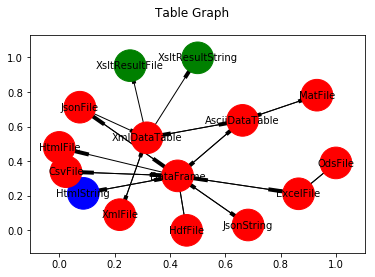

In [51]:
rectangular_graph.show()